In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import re

In [13]:
epoch_file_04 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2009_Analysis/'
epoch_file_22 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2022_Analysis/'
epoch_file_24 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2024_Analysis/'

datacube_04 = pd.read_csv(epoch_file_04 + 'datacube.csv')
datacube_04 = datacube_04.drop('Unnamed: 0', axis=1)
datacube_04 = datacube_04.to_numpy()

wave_04 = datacube_04[0, :]
spec_04 = datacube_04[1, :]  # Original spectra flux
#flux_22 = datacube_22[1, :] - masked_host  # QSO flux without host
err_04 = datacube_04[2, :]
host_04 = datacube_04[3, :]
qso_04 = datacube_04[4, :]
host_data_04 = datacube_04[1, :] - qso_04

datacube_22 = pd.read_csv(epoch_file_22 + 'datacube.csv')
datacube_22 = datacube_22.drop('Unnamed: 0', axis=1)
datacube_22 = datacube_22.to_numpy()

wave_22 = datacube_22[0, :]
spec_22 = datacube_22[1, :]  # Original spectra flux
#flux_22 = datacube_22[1, :] - masked_host  # QSO flux without host
err_22 = datacube_22[2, :]
host_22 = datacube_22[3, :]
qso_22 = datacube_22[4, :]
host_data_22 = datacube_22[1, :] - qso_22

datacube_24 = pd.read_csv(epoch_file_24 + 'datacube.csv')
datacube_24 = datacube_24.drop('Unnamed: 0', axis=1)
datacube_24 = datacube_24.to_numpy()

wave_24 = datacube_24[0, :]
spec_24 = datacube_24[1, :]  # Original spectra flux
#flux_22 = datacube_22[1, :] - masked_host  # QSO flux without host
err_24 = datacube_24[2, :]
host_24 = datacube_24[3, :]
qso_24 = datacube_24[4, :]
host_data_24 = datacube_24[1, :] - qso_24

'''
plt.figure(figsize=(10,5))
plt.title('Datacube')
plt.xlim(wave[0], wave[-1])
#plt.ylim(0, 140)

plt.plot(wave, spec, label='spec')
plt.plot(wave, host, label='host')
plt.plot(wave, qso, label='qso')
plt.plot(wave, host+qso, label='host+qso')
plt.plot(wave, spec - (host+qso), linestyle='--', label='residual')

plt.legend(fontsize=16)
plt.show()
'''
print(len(spec_04))
print(len(wave_04))

3618
3618


In [14]:
# 2004 Fitting Models
component_fit1_04 = pd.read_csv(epoch_file_04 + 'component_fit1.csv')
component_fit2_04 = pd.read_csv(epoch_file_04 + 'component_fit2.csv')

wave_eval_04 = component_fit1_04['wave_eval'].to_numpy()
lines_total_04 = component_fit1_04['lines_total'].to_numpy()
f_conti_model_eval_04 = component_fit1_04['f_conti_model_eval'].to_numpy()
PL_04 = component_fit1_04['PL'].to_numpy()
F_poly_conti_04 = component_fit1_04['F_poly_conti'].to_numpy()

#wave_04 = component_fit2_04['wave'].to_numpy()
#host_04 = component_fit2_04['host'].to_numpy() # NO 2004 HOST
flux_04 = component_fit2_04['flux'].to_numpy()
f_conti_model_04 = component_fit2_04['f_conti_model'].to_numpy()
line_flux_04 = component_fit2_04['line_flux'].to_numpy()
print(len(wave_04))
print(len(spec_04))


# 2022 Fitting Models
component_fit1_22 = pd.read_csv(epoch_file_22 + 'component_fit1.csv')
component_fit2_22 = pd.read_csv(epoch_file_22 + 'component_fit2.csv')

wave_eval_22 = component_fit1_22['wave_eval'].to_numpy()
lines_total_22 = component_fit1_22['lines_total'].to_numpy()
f_conti_model_eval_22 = component_fit1_22['f_conti_model_eval'].to_numpy()
PL_22 = component_fit1_22['PL'].to_numpy()
F_poly_conti_22 = component_fit1_22['F_poly_conti'].to_numpy()

wave_22 = component_fit2_22['wave'].to_numpy()
host_22 = component_fit2_22['host'].to_numpy()
flux_22 = component_fit2_22['flux'].to_numpy()
f_conti_model_22 = component_fit2_22['f_conti_model'].to_numpy()
line_flux_22 = component_fit2_22['line_flux'].to_numpy()



# 2024 Fitting Models
component_fit1_24 = pd.read_csv(epoch_file_24 + 'component_fit1.csv')
component_fit2_24 = pd.read_csv(epoch_file_24 + 'component_fit2.csv')

wave_eval_24 = component_fit1_24['wave_eval'].to_numpy()
lines_total_24 = component_fit1_24['lines_total'].to_numpy()
f_conti_model_eval_24 = component_fit1_24['f_conti_model_eval'].to_numpy()
PL_24 = component_fit1_24['PL'].to_numpy()
F_poly_conti_24 = component_fit1_24['F_poly_conti'].to_numpy()

wave_24 = component_fit2_24['wave'].to_numpy()
host_24 = component_fit2_24['host'].to_numpy()
flux_24 = component_fit2_24['flux'].to_numpy()
f_conti_model_24 = component_fit2_24['f_conti_model'].to_numpy()
line_flux_24 = component_fit2_24['line_flux'].to_numpy()

3618
3618


KeyError: 'host'

ValueError: x and y must have same first dimension, but have shapes (3519,) and (4792,)

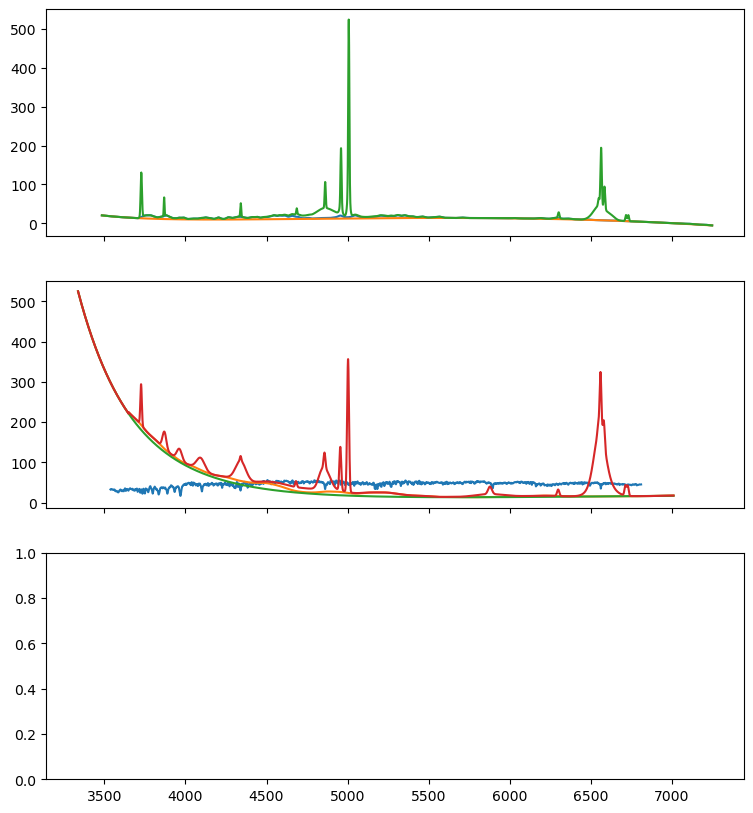

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 10), sharex=True)

ax1.plot(wave_eval_04, f_conti_model_eval_04, label='FeII')
ax1.plot(wave_eval_04, PL_04 + F_poly_conti_04, label='Conti')
ax1.plot(wave_eval_04, f_conti_model_eval_04 + lines_total_04, label='Line')

ax2.plot(wave_22, host_22, label='host')
ax2.plot(wave_eval_22, f_conti_model_eval_22, label='FeII')
ax2.plot(wave_eval_22, PL_22 + F_poly_conti_22, label='Conti')
ax2.plot(wave_eval_22, f_conti_model_eval_22 + lines_total_22, label='Line')

ax3.plot(wave_24, host_24, label='host')
ax3.plot(wave_eval_24, f_conti_model_eval_24, label='FeII')
ax3.plot(wave_eval_24, PL_24 + F_poly_conti_24, label='Conti')
ax3.plot(wave_eval_24, f_conti_model_eval_24 + lines_total_24, label='Line')

ax1.text(7500, 200, '2004', fontsize='14')
ax2.text(7500, 200, '2022', fontsize='14')
ax3.text(7500, 200, '2024', fontsize='14')

ax1.legend()
ax2.legend()
ax3.legend()

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.135, left=0.155)

plt.show()

plt.plot(wave_22, host_22)
plt.plot(wave_24, host_24)
plt.show()

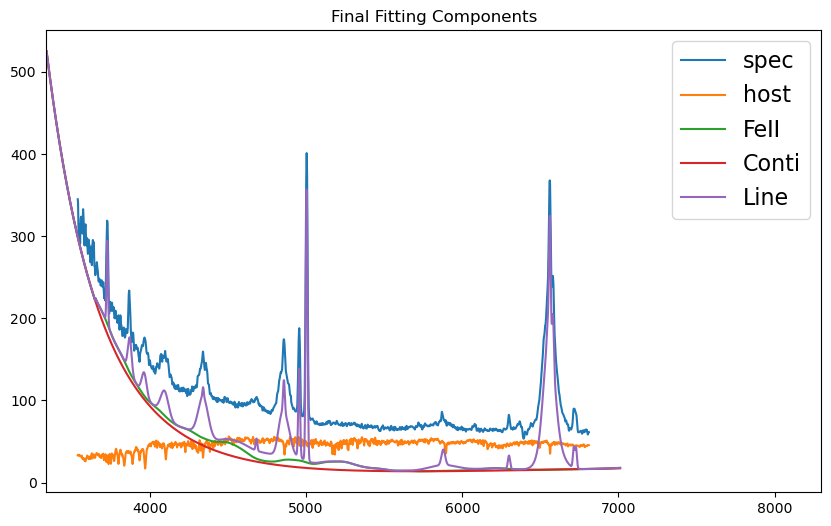

In [16]:
plt.figure(figsize=(10,6))
plt.title('Final Fitting Components')
#plt.xlim(wave[0], wave[-1])
plt.xlim(3336, 8300)

line_04 = f_conti_model_eval_04+lines_total_04
line_22 = f_conti_model_eval_22+lines_total_22
line_24 = f_conti_model_eval_24+lines_total_24

plt.plot(wave_22, spec_22, label='spec')
plt.plot(wave_22, host_22, label='host')
plt.plot(wave_eval_22, f_conti_model_eval_22, label='FeII')
plt.plot(wave_eval_22, PL_22+F_poly_conti_22, label='Conti')
plt.plot(wave_eval_22, line_22, label='Line')

plt.legend(fontsize=16)
plt.show()

# Trim and Interpolate Line Data

In [17]:
# Trim wave_eval to the range of the spectrum
def InterpolateSpectra(wave, flux, desired_wave):
    # Trim original wave to match desired_wave range
    trim = (wave > desired_wave.min()) & (wave < desired_wave.max())
    wave_trimmed = wave[trim]
    flux_trimmed = flux[trim]
    
    interpolator = interp1d(wave_trimmed, flux_trimmed, kind='linear', fill_value='extrapolate')
    flux_interpolated = interpolator(desired_wave)
    
    return flux_interpolated, wave_trimmed, flux_trimmed

In [18]:
len(wave_04)

3618

3618
3618


ValueError: x and y must have same first dimension, but have shapes (3519,) and (4792,)

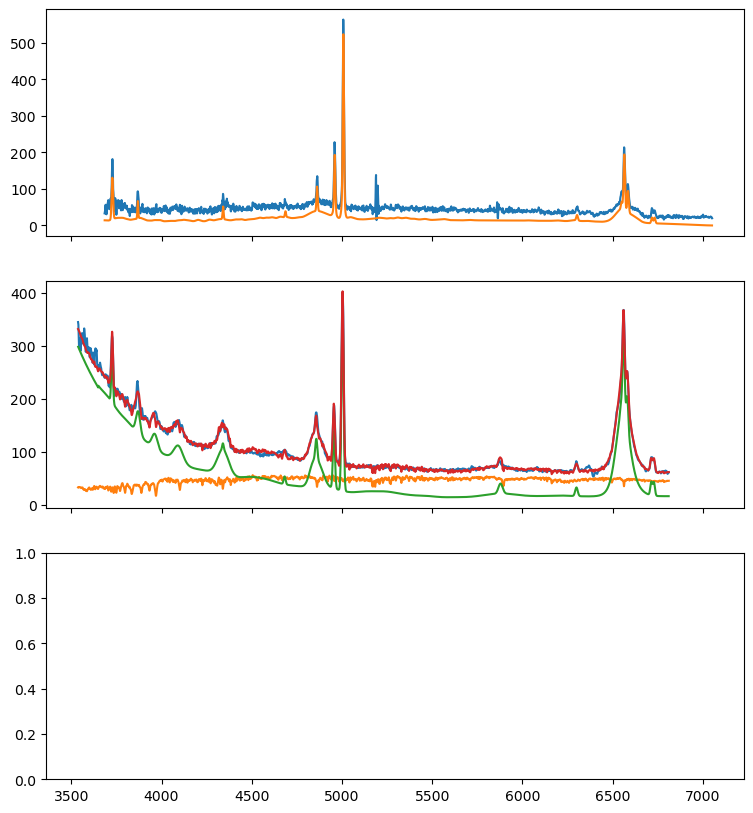

In [19]:
print(len(wave_04))
line_interp_04, wave_eval_trimmed_04, line_trimmed_04 = InterpolateSpectra(wave_eval_04, line_04, wave_04)
line_interp_22, wave_eval_trimmed_22, line_trimmed_22 = InterpolateSpectra(wave_eval_22, line_22, wave_22)
line_interp_24, wave_eval_trimmed_24, line_trimmed_24 = InterpolateSpectra(wave_eval_24, line_24, wave_24)
print(len(wave_04))
#model_04 = host_04 + line_interp_04
model_04 = line_trimmed_04 # No host to add so just keep this
model_22 = host_22 + line_interp_22
#model_24 = host_24 + line_interp_24


fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
ax1.plot(wave_04, spec_04, label='spec')
#ax1.plot(wave_04, host_04, label='host')
ax1.plot(wave_eval_trimmed_04, line_trimmed_04, label='line_trimmed')
#ax1.plot(wave_04, model_04, label='host+line')

ax2.plot(wave_22, spec_22, label='spec')
ax2.plot(wave_22, host_22, label='host')
ax2.plot(wave_eval_trimmed_22, line_trimmed_22, label='line_trimmed')
ax2.plot(wave_22, model_22, label='host+line')

ax3.plot(wave_24, spec_24, label='spec')
ax3.plot(wave_24, host_24, label='host')
ax3.plot(wave_eval_trimmed_24, line_trimmed_24, label='line_trimmed')
#ax3.plot(wave_24, model_24, label='host+line')

ax1.text(7500, 200, '2004', fontsize='14')
ax2.text(7500, 200, '2022', fontsize='14')
ax3.text(7500, 200, '2024', fontsize='14')

ax1.legend()
ax2.legend()
ax3.legend()

# Improve layout and show plot
fig.subplots_adjust(hspace=0, bottom=0.135, left=0.155)
plt.show()

# Compare Components

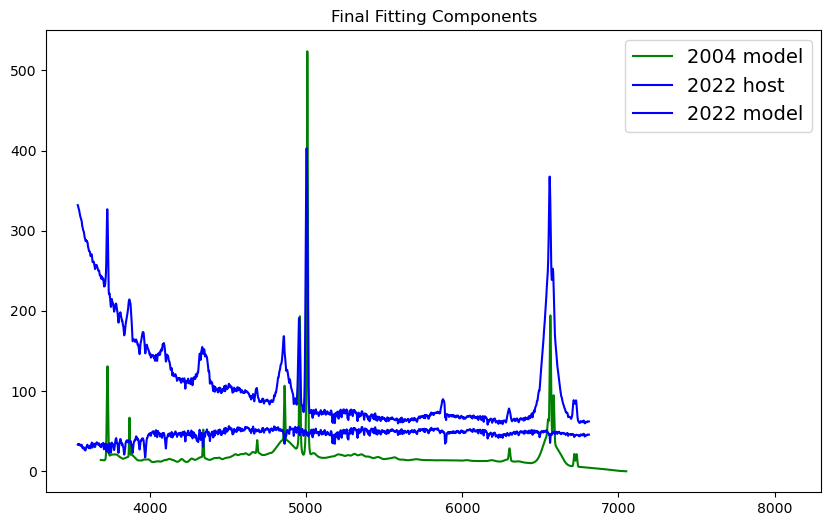

In [20]:
plt.figure(figsize=(10,6))
plt.title('Final Fitting Components')
#plt.xlim(wave[0], wave[-1])
plt.xlim(3336, 8300)

plt.plot(wave_eval_trimmed_04, line_trimmed_04, color='green', label='2004 model')
plt.plot(wave_22, host_22, color='blue', label='2022 host')
plt.plot(wave_22, model_22, color='blue', label='2022 model')
#plt.plot(wave_24, host_24, color='red', label='2024 host')
#plt.plot(wave_24, model_24, color='red', label='2024 model')

plt.legend(fontsize=14)
plt.show()

# Compare Host to 2004

In [ ]:
# Function calculating rest frame wavelength from host redshift
def restFrameWavelength(obs_wavelength, redshift): # takes list of measured wavelengths
    rest_wavelength = []
    for n in range(len(obs_wavelength)):
        rest_wavelength.append(obs_wavelength[n]/(redshift+1))
    return(np.array(rest_wavelength))

# Function that reads in the data from txt. files
def readTxt(file_path, errors):
    # Initialize empty lists to be returned
    values1 = []
    values2 = []
    err_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            
            # Check the row begins with a number - not holding a column title
            if line[0].isnumeric():
            
                # Split each line into separate values separated by one or more space or commas
                values = re.split(r'[\s,]+', line.strip())
                
                # Convert the values to floats and append them to the respective lists
                if len(values) > 1:
                    values1.append(float(values[0]))
                    values2.append(float(values[1]))
                    if errors == True:
                        err_values.append(float(values[2]))
    
    if errors == True:
        return(np.array(values1), np.array(values2), np.array(err_values))
    else:
        return(np.array(values1), np.array(values2))

file_path_2009 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/Data/6df_spectra/6dFJ0245455-030450-S-VR-j2009.txt'
wavelength_2009, flux_count_2009 = readTxt(file_path_2009, False)

# Scale 2009 flux counts to 10^-17 erg/s/cm^2/A matching [O III]
flux_2009 = 0.024660301828638015*flux_count_2009

# Approximate 10% error on 2009 measurements
flux_error_2009 = 0.1*flux_2009

# Convert to rest frame wavelength
z = 0.074550 # redshift of host galaxy
rest_wavelength_2009 = restFrameWavelength(wavelength_2009, z)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('2009 Comparison to 2022 Host')
#plt.xlim(wave[0], wave[-1])
plt.xlim(3336, 8300)

plt.plot(wave, spec, label='spec')
plt.plot(rest_wavelength_2009, flux_2009, label='2009')
plt.plot(wave, host, label='host')


plt.legend(fontsize=14)
plt.show()

# Subtract Host from 2009 Spectrum

In [ ]:
host_09 = InterpolateSpectra(wave, host, rest_wavelength_2009)[0]

plt.figure(figsize=(10,6))
plt.title('Host Subtracted 2009 Spectra')
#plt.xlim(wave[0], wave[-1])
plt.ylim(-20, 100)
plt.xlim(3336, 8300)

plt.plot(rest_wavelength_2009, flux_2009, label='2009')
plt.plot(rest_wavelength_2009, host_09, label='host')
plt.plot(rest_wavelength_2009, np.clip(flux_2009 - host_09, 0, None), label='2009')

plt.legend(fontsize=14)
plt.grid()
plt.show()